In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
from typing import cast

import gymnasium as gym

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv
import cyberbattle.samples.toyctf.automotive_ctf as autoctf

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/automotive_ctf_rulebased/plots"

In [5]:
# Parameters
gymid = "CyberBattleAutomotiveCTF-v0"
env_size = None
iteration_count = 100
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 32
maximum_total_credentials = 10
plots_dir = "notebooks/output/automotive_ctf_rulebased/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # gym_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Rulebased
Learning with: episode_count=20,iteration_count=100,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/20 'Rulebased' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:   35.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:   35.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:   48.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:   48.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   57.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   57.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:   63.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:   63.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   74.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   74.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  114.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  114.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:  174.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:  174.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  188.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  188.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  194.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  194.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  314.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  314.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  354.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  354.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  380.5|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  380.5|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  386.5|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  386.5|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  386.5|last_reward_at:   93|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/1 (0.83)
    explore-remote: 6/81 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/3 (0.57)
  exploit deflected to exploration: 4
  ## Episode: 2/20 'Rulebased' ϵ=0.8921, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   25.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   25.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   37.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   37.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:   77.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:   77.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:   90.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:   90.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:   90.0|last_reward_at:   51|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 2/87 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/1 (0.50)
  exploit deflected to exploration: 5
  ## Episode: 3/20 'Rulebased' ϵ=0.8842, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:   14.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   54.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   54.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:   68.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:   68.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:   74.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:   74.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:   84.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:   84.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:   84.0|last_reward_at:   94|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/0 (1.00)
    explore-remote: 0/95 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 4/20 'Rulebased' ϵ=0.8764, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   11.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   17.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   17.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   28.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   28.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:   39.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:   39.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:   48.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:   48.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:   61.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:   61.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  101.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  101.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  112.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  112.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  172.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  172.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  185.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  185.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  196.5|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  196.5|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  202.5|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  202.5|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  262.5|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  262.5|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  270.5|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  270.5|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  270.5|last_reward_at:   99|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/4 (0.56)
    explore-remote: 6/80 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/2 (0.60)
  exploit deflected to exploration: 2
  ## Episode: 5/20 'Rulebased' ϵ=0.8687, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   54.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   54.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   60.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   60.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   71.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   71.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:   77.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:   77.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:   90.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:   90.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  150.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  150.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 85|reward:  164.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 85|reward:  164.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  178.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  178.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward:  218.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward:  218.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  218.0|last_reward_at:   90|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/3 (0.57)
    explore-remote: 3/86 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/1 (0.75)
  exploit deflected to exploration: 9
  ## Episode: 6/20 'Rulebased' ϵ=0.8611, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   54.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   65.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   65.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   71.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   71.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:   84.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:   84.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  144.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  144.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  150.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 62|reward:  164.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 62|reward:  164.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  204.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  204.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 85|reward:  218.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 85|reward:  218.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  224.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  224.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 91|reward:  344.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 91|reward:  344.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 6|Iteration 100|reward:  344.0|last_reward_at:   91|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/2 (0.71)
    explore-remote: 3/85 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/1 (0.80)
  exploit deflected to exploration: 6
  ## Episode: 7/20 'Rulebased' ϵ=0.8535, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   54.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   54.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:   65.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:   65.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:   78.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:   78.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  138.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  138.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  149.5|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  149.5|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  155.5|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  155.5|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  166.5|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  166.5|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  172.5|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  172.5|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward:  185.5|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward:  185.5|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 7|Iteration 100|reward:  185.5|last_reward_at:   80|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/3 (0.62)
    explore-remote: 3/82 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/5 (0.29)
  exploit deflected to exploration: 13
  ## Episode: 8/20 'Rulebased' ϵ=0.8460, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   24.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   35.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   35.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:   95.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:   95.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  101.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  101.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  112.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  112.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  125.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  125.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  165.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  165.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  174.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  174.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 83|reward:  180.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 83|reward:  180.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  220.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  220.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  226.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  226.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  226.0|last_reward_at:  100|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/4 (0.50)
    explore-remote: 5/82 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/2 (0.60)
  exploit deflected to exploration: 10
  ## Episode: 9/20 'Rulebased' ϵ=0.8386, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   47.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   60.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   60.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  100.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  100.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  160.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  160.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  174.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  174.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  183.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  183.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  196.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  196.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  202.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  202.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  208.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  208.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  214.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  214.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 56|reward:  222.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 56|reward:  222.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 60|reward:  282.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 60|reward:  282.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  288.5|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  288.5|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 73|reward:  294.5|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 73|reward:  294.5|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 9|Iteration 90|reward:  334.5|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 9|Iteration 90|reward:  334.5|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 9|Iteration 100|reward:  334.5|last_reward_at:   90|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/4 (0.64)
    explore-remote: 7/69 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 2
  ## Episode: 10/20 'Rulebased' ϵ=0.8312, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward:   35.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward:   35.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:   44.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:   44.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward:   84.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward:   84.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:   90.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:   90.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  104.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  104.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  110.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  110.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  110.0|last_reward_at:   71|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 4/83 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/7 (0.12)
  exploit deflected to exploration: 8
  ## Episode: 11/20 'Rulebased' ϵ=0.8239, 


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:   46.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:   46.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:   59.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:   59.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  119.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  119.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  159.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  159.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  173.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  173.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  293.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  293.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 45|reward:  302.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 45|reward:  302.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward:  342.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward:  342.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 56|reward:  348.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 56|reward:  348.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 11|Iteration 72|reward:  361.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 11|Iteration 72|reward:  361.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 11|Iteration 74|reward:  421.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 11|Iteration 74|reward:  421.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 11|Iteration 76|reward:  427.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 11|Iteration 76|reward:  427.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 11|Iteration 90|reward:  427.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 11|Iteration 99|reward:  453.5|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 11|Iteration 99|reward:  453.5|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 11|Iteration 100|reward:  453.5|last_reward_at:   99|Elapsed Time: 0:00:00||

  Episode 11 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/3 (0.62)
    explore-remote: 6/77 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 20
  ## Episode: 12/20 'Rulebased' ϵ=0.8167, 


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:   28.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:   28.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:   53.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward:   66.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward:   66.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:   75.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:   75.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  135.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  135.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 47|reward:  255.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 47|reward:  255.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 12|Iteration 52|reward:  263.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 12|Iteration 52|reward:  263.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 12|Iteration 67|reward:  303.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 12|Iteration 67|reward:  303.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 12|Iteration 68|reward:  343.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 12|Iteration 68|reward:  343.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 12|Iteration 76|reward:  373.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 12|Iteration 76|reward:  373.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 12|Iteration 98|reward:  373.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 12|Iteration 100|reward:  373.0|last_reward_at:   76|Elapsed Time: 0:00:00||

  Episode 12 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/2 (0.67)
    explore-remote: 5/78 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 5
  ## Episode: 13/20 'Rulebased' ϵ=0.8096, 


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:   17.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:   17.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:   28.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:   28.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:   41.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:   41.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  101.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  101.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  112.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  112.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  123.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  123.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  131.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  171.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  171.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward:  177.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward:  177.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 65|reward:  183.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 65|reward:  183.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 13|Iteration 100|reward:  183.0|last_reward_at:   65|Elapsed Time: 0:00:00||

  Episode 13 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/3 (0.57)
    explore-remote: 5/86 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/0 (1.00)
  exploit deflected to exploration: 18
  ## Episode: 14/20 'Rulebased' ϵ=0.8025, 


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward:   11.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:   22.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:   22.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 14|Iteration 42|reward:   35.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 14|Iteration 42|reward:   35.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 14|Iteration 43|reward:   95.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 14|Iteration 43|reward:   95.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 14|Iteration 45|reward:  106.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 14|Iteration 45|reward:  106.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 14|Iteration 62|reward:  120.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 14|Iteration 62|reward:  120.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 14|Iteration 67|reward:  126.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 14|Iteration 67|reward:  126.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 14|Iteration 68|reward:  166.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 14|Iteration 68|reward:  166.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  172.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  172.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 79|reward:  185.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 79|reward:  185.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 14|Iteration 80|reward:  245.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 14|Iteration 80|reward:  245.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 14|Iteration 89|reward:  256.5|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 14|Iteration 89|reward:  256.5|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 14|Iteration 100|reward:  256.5|last_reward_at:   89|Elapsed Time: 0:00:00||

  Episode 14 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/1 (0.83)
    explore-remote: 4/87 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 20
  ## Episode: 15/20 'Rulebased' ϵ=0.7956, 


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:   11.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:   25.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:   25.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:   65.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:   65.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:   76.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:   76.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:   89.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:   89.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward:  149.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward:  149.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  160.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  160.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 55|reward:  174.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 55|reward:  174.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 15|Iteration 60|reward:  294.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 15|Iteration 60|reward:  294.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 62|reward:  300.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 62|reward:  300.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 15|Iteration 78|reward:  306.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 15|Iteration 78|reward:  306.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 15|Iteration 97|reward:  314.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 15|Iteration 97|reward:  314.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 15|Iteration 98|reward:  365.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 15|Iteration 98|reward:  365.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 15|Iteration 99|reward:  405.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 15|Iteration 99|reward:  405.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 15|Iteration 100|reward:  405.0|last_reward_at:   99|Elapsed Time: 0:00:00||

  Episode 15 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/3 (0.62)
    explore-remote: 5/83 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 17
  ## Episode: 16/20 'Rulebased' ϵ=0.7886, 


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:   84.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:   84.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:   95.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:   95.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  106.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  106.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  117.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 41|reward:  123.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 41|reward:  123.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 16|Iteration 63|reward:  131.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 16|Iteration 63|reward:  131.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 16|Iteration 69|reward:  144.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 16|Iteration 69|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 16|Iteration 72|reward:  153.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 16|Iteration 72|reward:  153.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 16|Iteration 82|reward:  167.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 16|Iteration 82|reward:  167.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 16|Iteration 92|reward:  207.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 16|Iteration 92|reward:  207.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 16|Iteration 100|reward:  207.0|last_reward_at:   92|Elapsed Time: 0:00:00||

  Episode 16 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/4 (0.50)
    explore-remote: 6/75 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/9 (0.18)
  exploit deflected to exploration: 12
  ## Episode: 17/20 'Rulebased' ϵ=0.7818, 


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:   11.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:   24.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:   24.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:   35.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:   35.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:   95.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:   95.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  103.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  103.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 41|reward:  143.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 41|reward:  143.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 17|Iteration 46|reward:  157.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 17|Iteration 46|reward:  157.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 17|Iteration 48|reward:  163.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 17|Iteration 48|reward:  163.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 17|Iteration 54|reward:  283.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 17|Iteration 54|reward:  283.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 17|Iteration 55|reward:  289.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 17|Iteration 55|reward:  289.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 17|Iteration 56|reward:  319.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 17|Iteration 56|reward:  319.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 17|Iteration 61|reward:  333.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 17|Iteration 61|reward:  333.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 17|Iteration 66|reward:  343.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 17|Iteration 66|reward:  343.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 17|Iteration 78|reward:  349.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 17|Iteration 78|reward:  349.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 17|Iteration 79|reward:  400.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 17|Iteration 79|reward:  400.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 17|Iteration 82|reward:  410.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 17|Iteration 82|reward:  410.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 17|Iteration 87|reward:  421.5|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 17|Iteration 87|reward:  421.5|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 17|Iteration 100|reward:  421.5|last_reward_at:   87|Elapsed Time: 0:00:00||

  Episode 17 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/1 (0.88)
    explore-remote: 5/71 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/11 (0.31)
  exploit deflected to exploration: 8
  ## Episode: 18/20 'Rulebased' ϵ=0.7750, 


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:   11.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 30|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 30|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:   39.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:   39.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:   50.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:   50.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:   64.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:   64.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward:   72.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward:   72.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 58|reward:  112.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 58|reward:  112.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 18|Iteration 61|reward:  125.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 18|Iteration 61|reward:  125.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 18|Iteration 72|reward:  185.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 18|Iteration 72|reward:  185.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 18|Iteration 91|reward:  194.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 18|Iteration 91|reward:  194.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 18|Iteration 100|reward:  194.0|last_reward_at:   91|Elapsed Time: 0:00:00||

  Episode 18 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/3 (0.57)
    explore-remote: 5/75 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/11 (0.15)
  exploit deflected to exploration: 7
  ## Episode: 19/20 'Rulebased' ϵ=0.7683, 


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:   84.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:   84.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:   95.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:   95.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  106.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  106.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  119.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  119.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  179.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  179.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  185.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  185.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  193.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  193.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward:  233.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward:  233.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 42|reward:  247.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 42|reward:  247.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 19|Iteration 56|reward:  287.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 19|Iteration 56|reward:  287.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 19|Iteration 75|reward:  287.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 19|Iteration 86|reward:  301.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 19|Iteration 86|reward:  301.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 19|Iteration 88|reward:  311.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 19|Iteration 88|reward:  311.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 19|Iteration 100|reward:  311.0|last_reward_at:   88|Elapsed Time: 0:00:00||

  Episode 19 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/4 (0.50)
    explore-remote: 5/77 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 18
  ## Episode: 20/20 'Rulebased' ϵ=0.7616, 


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."


Episode 20|Iteration 9|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 20|Iteration 9|reward:   24.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 20|Iteration 9|reward:   24.0|last_reward_at:    9|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."
Telematics[user=root],discovered,NaN,None,[]


Episode 20|Iteration 10|reward:   24.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 10|reward:   84.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 10|reward:   84.0|last_reward_at:   10|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."


Episode 20|Iteration 11|reward:   84.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 20|Iteration 12|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 20|Iteration 12|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."
OTA.Server,discovered,NaN,None,"[StealFirmwareArtifacts, DownloadUpdateBundle]"


Episode 20|Iteration 13|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 20|Iteration 15|reward:  137.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 20|Iteration 15|reward:  137.0|last_reward_at:   15|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
OTA.Server,owned,"[OTA, Backend]",[],"[StealFirmwareArtifacts, DownloadUpdateBundle]"
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."


Episode 20|Iteration 16|reward:  137.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 20|Iteration 29|reward:  151.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 20|Iteration 29|reward:  151.0|last_reward_at:   29|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
OTA.Server,owned,"[OTA, Backend]",[],"[StealFirmwareArtifacts, DownloadUpdateBundle]"
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."
GTW,discovered,NaN,None,[]


Episode 20|Iteration 30|reward:  151.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 20|Iteration 32|reward:  157.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 20|Iteration 32|reward:  157.0|last_reward_at:   32|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
OTA.Server,owned,"[OTA, Backend]",[],"[StealFirmwareArtifacts, DownloadUpdateBundle]"
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."
GTW,discovered,NaN,None,[]


Episode 20|Iteration 33|reward:  157.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 20|Iteration 34|reward:  277.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 20|Iteration 34|reward:  277.0|last_reward_at:   34|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
OTA.Server,owned,"[OTA, Backend]",[],"[StealFirmwareArtifacts, DownloadUpdateBundle]"
GTW,owned,"[Gateway, Bridge]","[LeakBusTopology, EnumerateECUs, DumpBusAccess...",[]
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."


Episode 20|Iteration 35|reward:  277.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 20|Iteration 54|reward:  291.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 20|Iteration 54|reward:  291.0|last_reward_at:   54|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
OTA.Server,owned,"[OTA, Backend]",[],"[StealFirmwareArtifacts, DownloadUpdateBundle]"
GTW,owned,"[Gateway, Bridge]","[LeakBusTopology, EnumerateECUs, DumpBusAccess...",[]
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."
OBD,discovered,NaN,None,[]


Episode 20|Iteration 55|reward:  291.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 20|Iteration 57|reward:  331.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 20|Iteration 57|reward:  331.0|last_reward_at:   57|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[ScanWIFINetworks, InspectVehiclePhysical, Acq...",[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
OTA.Server,owned,"[OTA, Backend]",[],"[StealFirmwareArtifacts, DownloadUpdateBundle]"
GTW,owned,"[Gateway, Bridge]","[LeakBusTopology, EnumerateECUs, DumpBusAccess...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics,discovered,NaN,None,"[ExploitTelematicsRCE, AbuseRemoteControlAPI, ..."


Episode 20|Iteration 58|reward:  331.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 20|Iteration 74|reward:  331.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 20|Iteration 97|reward:  331.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 20|Iteration 100|reward:  331.0|last_reward_at:   57|Elapsed Time: 0:00:02||

  Episode 20 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 4/88 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 23
simulation ended


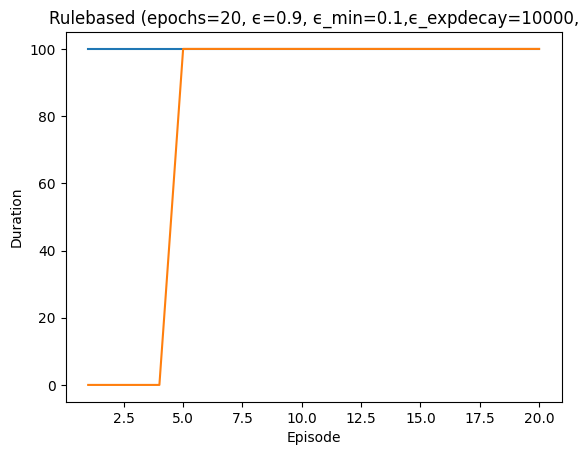

In [8]:
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"credlookup-{gymid}"),
    title="Rulebased",
)

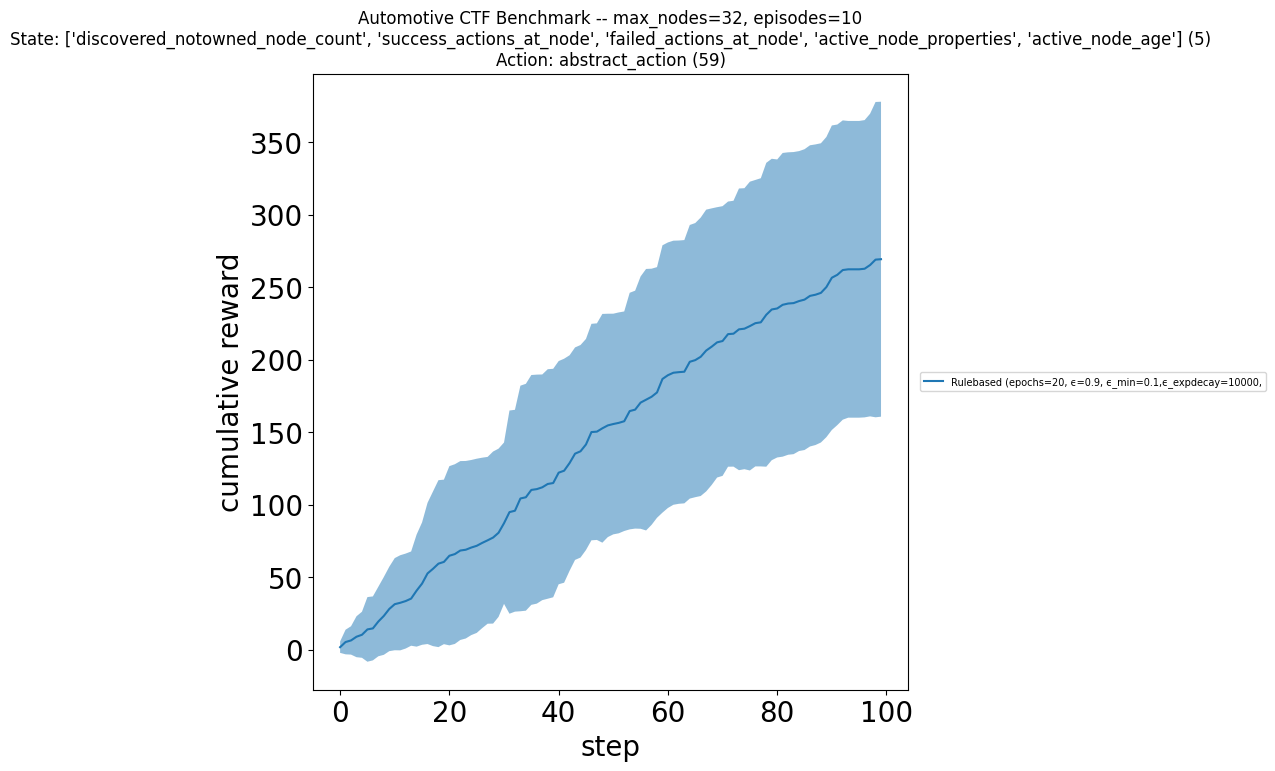

In [9]:
all_runs = [
    credlookup_run,
]

# Plot averaged cumulative rewards
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Automotive CTF Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

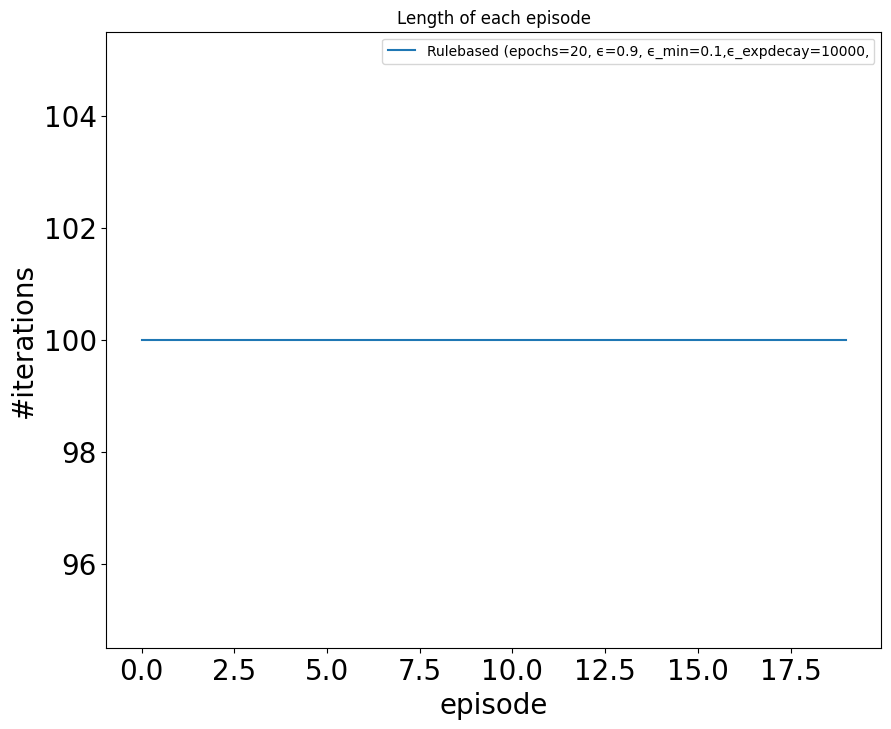

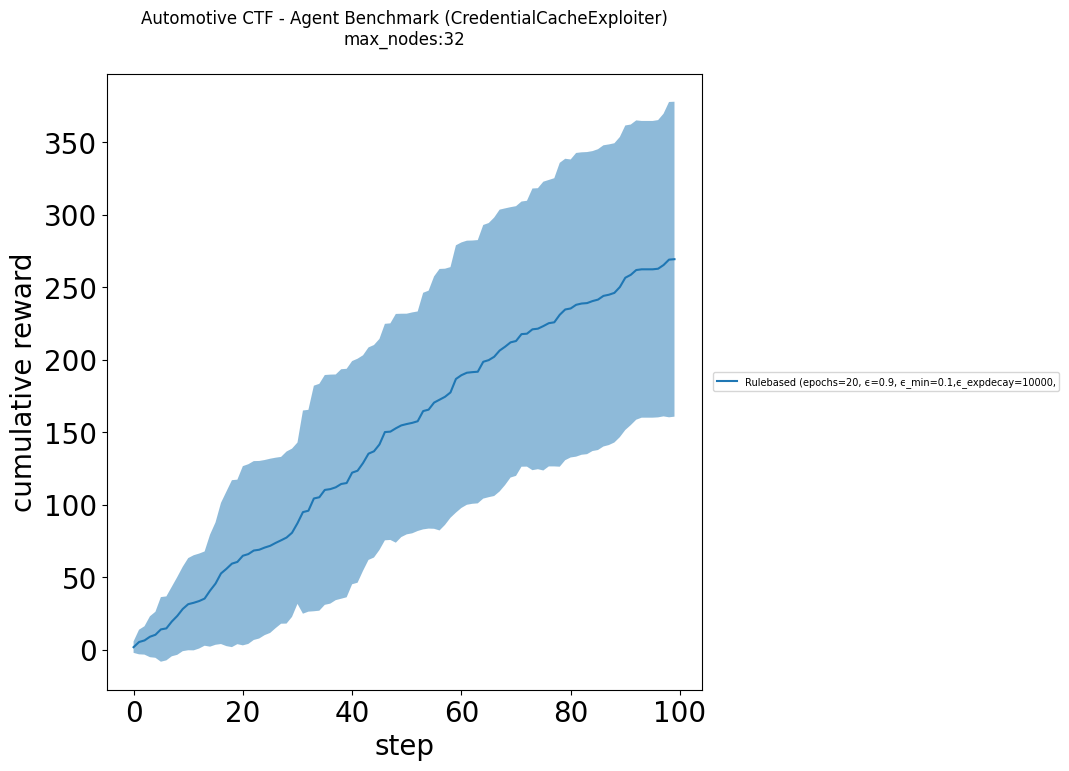

In [10]:
contenders = [credlookup_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Automotive CTF - Agent Benchmark (CredentialCacheExploiter)\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

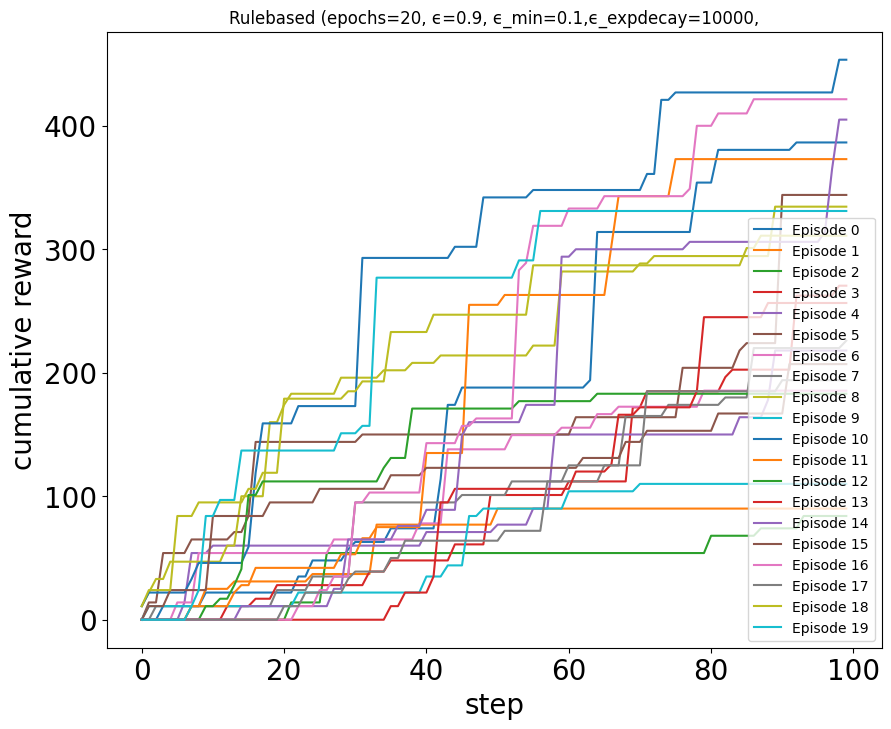

In [11]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)